In [44]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#loading dataset
df=pd.read_csv("/Users/User/Downloads/Algerian_forest_fires_cleaned.csv")

In [46]:
#reading first five rows from the datafrane
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [47]:
#provide the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [48]:
#generate descriptive summary of the dataframe
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Data Cleaning

## Checking missing values

In [49]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### There are no missing values have been found in any column.

## Checking duplicates rows

In [50]:
duplicated_rows=df[df.duplicated()==True]
duplicated_rows

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


### There are no duplicated rows have been founded in the dataframe.

## Checking the unique values and their counts for every column

In [51]:
def unique_values_counts(df): #defining a function
    unique_data={} #created a empty dictionary
    for column in df.columns:
        unique_values=df[column].unique()
        unique_count=df[column].nunique()
        unique_data[column]={'Unique Counts': unique_count,'Unique Values': unique_values}
    return unique_data

unique_data=unique_values_counts(df)
unique_data

{'day': {'Unique Counts': 31,
  'Unique Values': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        dtype=int64)},
 'month': {'Unique Counts': 4,
  'Unique Values': array([6, 7, 8, 9], dtype=int64)},
 'year': {'Unique Counts': 1, 'Unique Values': array([2012], dtype=int64)},
 'Temperature': {'Unique Counts': 19,
  'Unique Values': array([29, 26, 25, 27, 31, 33, 30, 28, 32, 34, 35, 36, 37, 22, 24, 38, 39,
         40, 42], dtype=int64)},
 'RH': {'Unique Counts': 62,
  'Unique Values': array([57, 61, 82, 89, 77, 67, 54, 73, 88, 79, 65, 81, 84, 78, 80, 55, 62,
         66, 64, 53, 47, 50, 68, 75, 76, 63, 69, 70, 59, 48, 45, 60, 51, 52,
         58, 86, 74, 71, 49, 44, 41, 42, 90, 87, 72, 46, 37, 36, 56, 43, 83,
         29, 34, 33, 35, 39, 31, 21, 40, 24, 38, 26], dtype=int64)},
 'Ws': {'Unique Counts': 18,
  'Unique Values': array([18, 13, 22, 16, 14, 15, 12, 19, 21, 20, 17, 26, 11, 10,  9, 

In [52]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

#### In this column, we can see the spaces after the chacarters which can arise an issue while doing mapping. To remove the extra whitespace, we can use 'str.strip()' method.

In [53]:
df['Classes']=df['Classes'].str.strip()

## Mapping categorical column

In [54]:
df['Classes']=df['Classes'].map({'not fire':0, 'fire':1})
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


# Data Visualization

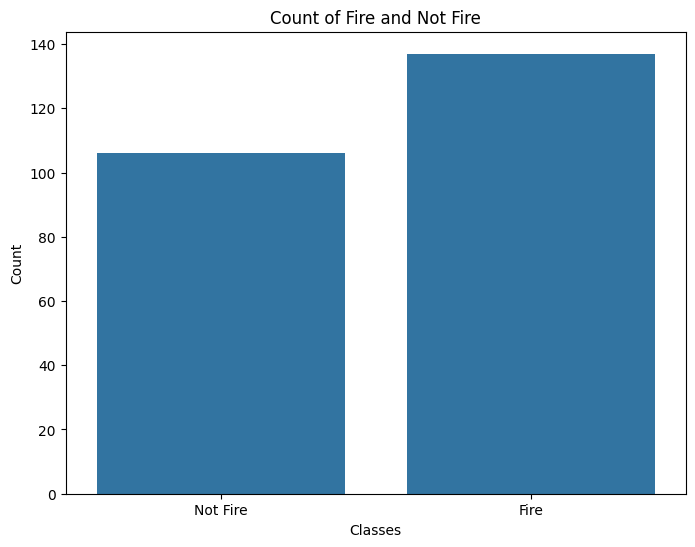

In [55]:
import seaborn as sns
#Count of each class by using bar chart
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Classes')
plt.title('Count of Fire and Not Fire')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['Not Fire','Fire'])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_24008\3082205148.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Temperature', y='RH' ,palette='orange')


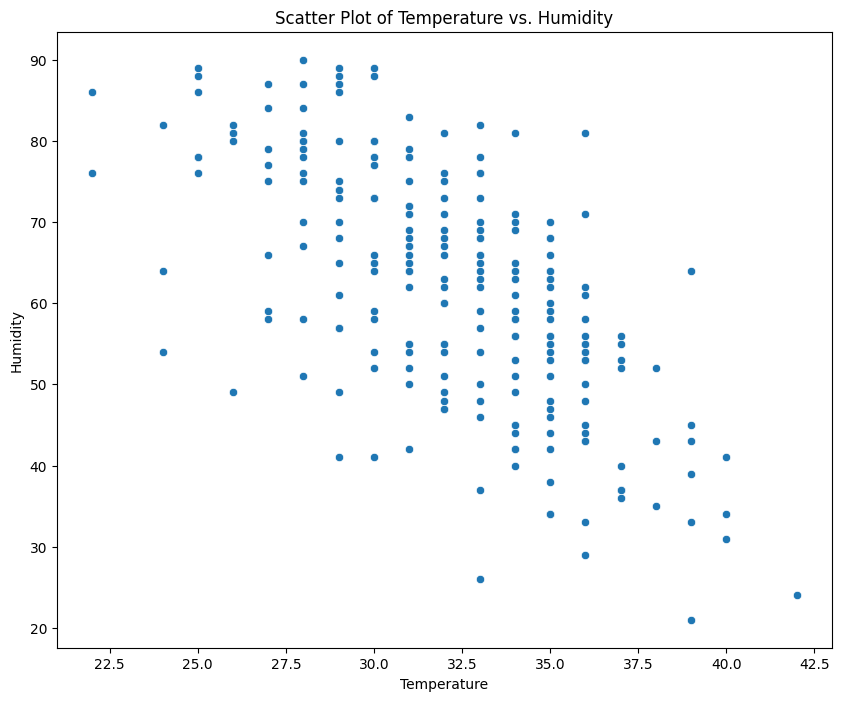

In [56]:
# plotting scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Temperature', y='RH' ,palette='orange')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()


#### Lower relative humidity means drier air, which can desiccate vegetation and increase the likelihood of fires spreading and starting easily.

<function matplotlib.pyplot.show(close=None, block=None)>

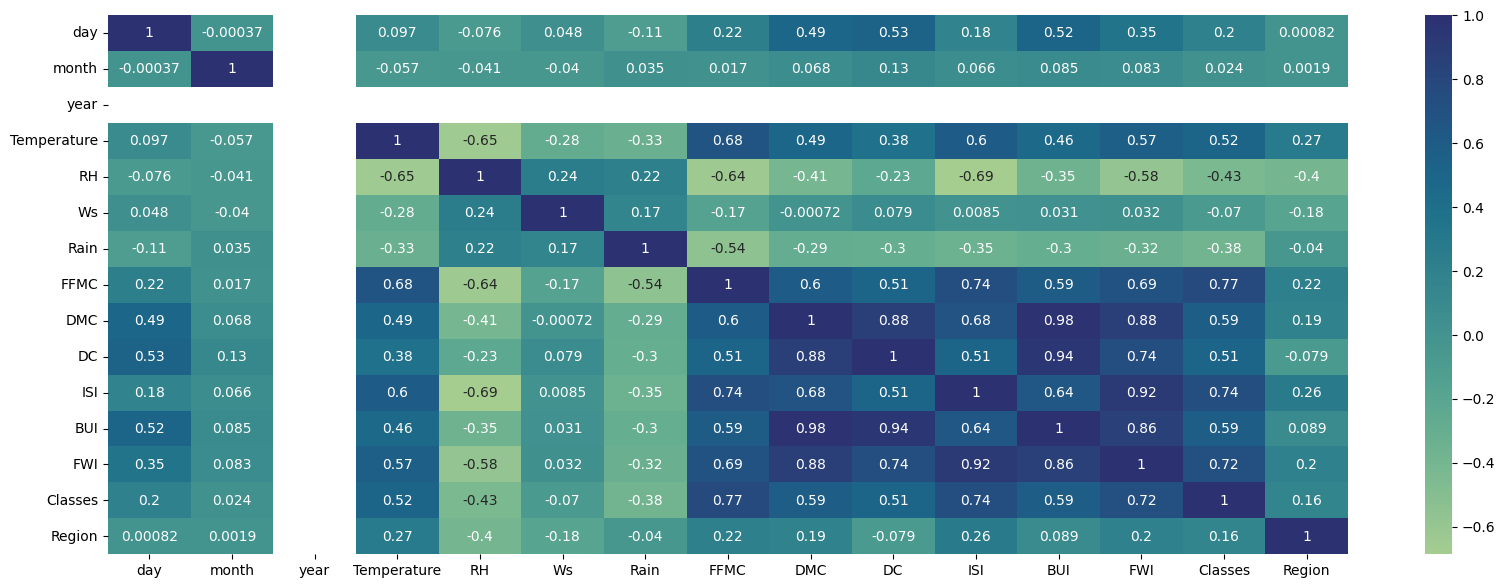

In [57]:
#plotting heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show

#### Due to multi-collinearity, I am dropping BUI, DC as I am prioritizing DMC.
#### Following definitions help me to get an idea,
##### 1. DMC represents the moisture content of loosely compacted organic layers beneath the litter.
##### 2. DC reflects the moisture content of deep, compact organic layers.
##### 3. BUI integrates the DMC and DC to represent the total fuel available for combustion.

In [58]:
# Feature Engineering
df.drop(['DC','BUI'],axis=1,inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


## Split Input and Target Variables

In [59]:
X=df[['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','ISI','Classes','Region']] #Independent Variables
y=df['FWI'] #Dependent Variables

In [60]:
X.shape, y.shape

((243, 12), (243,))

In [61]:
# Spliting it for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [63]:
X_train

array([[ 0.91502056,  1.35966051,  0.        , ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 1.14086533,  0.45009451,  0.        , ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [-1.00465998, -0.45947148,  0.        , ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.68219429,  1.35966051,  0.        , ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 1.47963249, -0.45947148,  0.        , ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.55297044,  1.35966051,  0.        , ..., -0.88904223,
        -1.14434427, -1.01036297]])

## Model Building

#### Multiple Linear Regression

In [64]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
lr.coef_, lr.intercept_

(array([ 1.91105859e-01,  1.03325799e-01,  1.38777878e-16,  2.51830061e-02,
        -1.80672991e-01, -1.07194353e-03, -5.25859347e-02, -8.68273268e-01,
         3.67509030e+00,  4.91920307e+00,  4.02695379e-01, -3.81594339e-01]),
 7.420103092783505)

In [66]:
#test the model
y_pred=lr.predict(X_test)
y_pred

array([ 8.24733596e+00,  7.48785015e+00, -5.58541879e-01,  4.54729645e+00,
        6.99006592e+00,  1.64840814e+00,  1.92438158e+00,  7.98308732e+00,
        1.41150349e+00,  3.58284508e+00,  3.17725550e-01,  9.82171465e+00,
        9.46398290e+00,  1.70090946e+01,  1.85782010e+01,  1.13306317e+00,
        2.14455408e+00,  2.08652684e-02,  7.01156554e+00,  2.81413860e+00,
        1.20931451e+00,  2.70884062e-01,  6.81335380e+00,  4.43255803e-02,
        2.10387427e+01,  5.15784200e+00,  5.65562868e+00,  9.77645366e+00,
       -1.85973080e-01,  9.58561581e+00,  6.77418806e+00, -4.66350280e-01,
        1.04132070e+01,  1.47016502e+01,  1.45686764e+00,  1.34570147e-01,
        1.97335945e+00,  6.12271904e+00, -4.76675128e-01,  1.65234282e-01,
        6.73852202e+00,  2.19930273e+00,  8.79127768e+00, -1.92225980e-01,
        1.55309279e+01,  8.14374240e+00,  8.14030192e+00,  1.28047652e+00,
        1.32290490e+01])

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2_score:{r2_score(y_test,y_pred)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred)}')
print(f'MSE:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

R2_score:0.9785210047261829
MEA:0.5392814181571726
MSE:0.6509944419630228
RMSE:0.8068422658506573


In [68]:
#selecting the important features by using recursive feature elimination
from sklearn.feature_selection import RFE
rfe=RFE(estimator=LinearRegression(),n_features_to_select=5)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [69]:
# Get the selected feature names
selected_features = rfe.get_feature_names_out(input_features=X.columns)
print(selected_features)

['FFMC' 'DMC' 'ISI' 'Classes' 'Region']


#### Polynomial Regression

In [70]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly.fit_transform(X)

In [71]:
from sklearn.model_selection import train_test_split
X_tr_poly, X_te_poly, y_tr_poly, y_te_poly= train_test_split(X_poly,y,test_size=0.2,random_state=42)

In [72]:
#model building
from sklearn.linear_model import LinearRegression
#creating object for my model
lrr=LinearRegression()
#training the model
lrr.fit(X_tr_poly,y_tr_poly)

LinearRegression()

In [73]:
lrr.intercept_,lrr.coef_

(1.2363791860514137,
 array([ 2.34232854e-08, -5.09091024e-07, -6.27210252e-13,  9.97163363e-09,
         1.59507610e-08, -9.37888098e-09,  1.22766461e-07,  5.28320466e-08,
        -1.35096518e-07, -1.45611370e-06,  1.63197510e-06,  3.67080225e-07,
        -5.32649873e-05,  2.46815033e-03,  4.71276473e-05, -3.37161446e-03,
        -6.76458940e-04,  1.25856927e-03,  6.88149862e-04,  8.94740508e-05,
         2.98352047e-03,  2.63939559e-03, -7.84675726e-03, -3.38844686e-03,
        -2.19400370e-03, -1.02429039e-03,  4.67188938e-02,  7.86180873e-03,
         1.05425370e-03,  8.21244178e-03, -9.33742774e-04,  1.63033150e-02,
         5.38030286e-02, -2.62162198e-01,  4.20266206e-02, -1.83880688e-16,
         2.00638514e-05,  3.20929535e-05, -1.88700498e-05,  2.47007292e-04,
         1.06298609e-04, -2.71813981e-04, -2.92970070e-03,  3.28353390e-03,
         7.38565438e-04, -1.54374206e-03, -3.20631853e-03, -1.33956251e-03,
         1.54174663e-02,  3.73764599e-04,  5.12837121e-04,  3.10792

In [74]:
#test the model
y_pred_poly=lrr.predict(X_te_poly)
y_pred

array([ 8.24733596e+00,  7.48785015e+00, -5.58541879e-01,  4.54729645e+00,
        6.99006592e+00,  1.64840814e+00,  1.92438158e+00,  7.98308732e+00,
        1.41150349e+00,  3.58284508e+00,  3.17725550e-01,  9.82171465e+00,
        9.46398290e+00,  1.70090946e+01,  1.85782010e+01,  1.13306317e+00,
        2.14455408e+00,  2.08652684e-02,  7.01156554e+00,  2.81413860e+00,
        1.20931451e+00,  2.70884062e-01,  6.81335380e+00,  4.43255803e-02,
        2.10387427e+01,  5.15784200e+00,  5.65562868e+00,  9.77645366e+00,
       -1.85973080e-01,  9.58561581e+00,  6.77418806e+00, -4.66350280e-01,
        1.04132070e+01,  1.47016502e+01,  1.45686764e+00,  1.34570147e-01,
        1.97335945e+00,  6.12271904e+00, -4.76675128e-01,  1.65234282e-01,
        6.73852202e+00,  2.19930273e+00,  8.79127768e+00, -1.92225980e-01,
        1.55309279e+01,  8.14374240e+00,  8.14030192e+00,  1.28047652e+00,
        1.32290490e+01])

In [75]:
#evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2_score:{r2_score(y_test,y_pred_poly)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred_poly)}')
print(f'MSE:{mean_squared_error(y_test,y_pred_poly)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_poly))}')

R2_score:0.9951640008478723
MEA:0.27192274478332124
MSE:0.14657150063302582
RMSE:0.3828465758408005


## Regularisation

r2_score:0.9785209720518709
MEA:0.539281924358429
MSE:0.6509954322698382
RMSE:0.8068428795433708


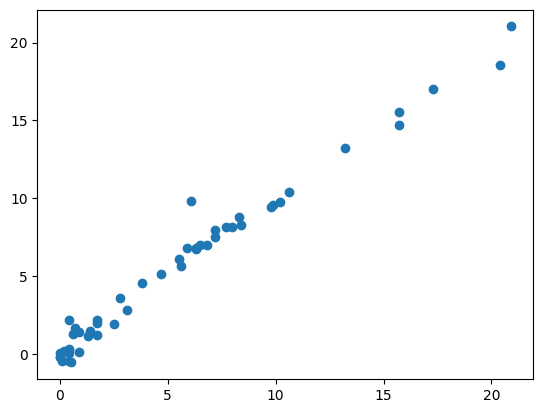

In [76]:
#Rigde Regularisation
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rd=Ridge(alpha=0.00005) #as alpha changes accuracy improves and it is a learning rate
rd.fit(X_train,y_train)
y_pred_rd=rd.predict(X_test)
print(f'r2_score:{r2_score(y_test,y_pred_rd)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred_rd)}')
print(f'MSE:{mean_squared_error(y_test,y_pred_rd)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_rd))}')
plt.scatter(y_test,y_pred_rd)

r2_score:0.9777997147400515
MEA:0.5537275379145151


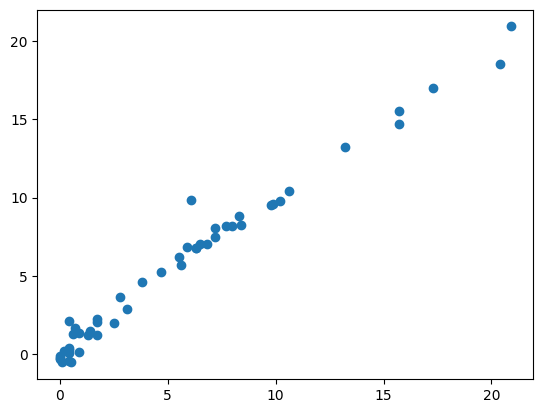

In [77]:
#Ridge Regression with CV
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
print(f'r2_score:{r2_score(y_test,y_pred)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred)}')   
plt.scatter(y_test,y_pred)  

r2_score:0.9430507218123663
MEA:1.0093958815851463
MSE:1.726042726921602
RMSE:1.3137894530409362


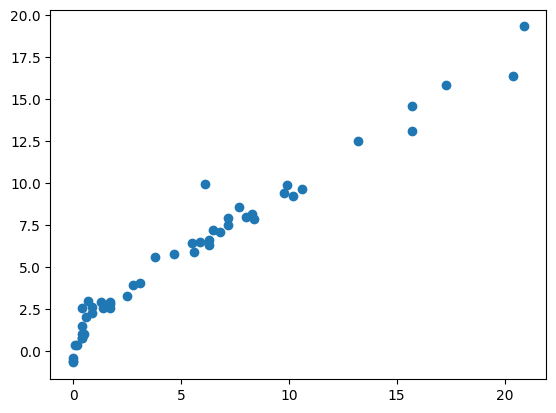

In [78]:
#Lasso Regularisation
ls=Lasso()
ls.fit(X_train,y_train)
y_pred_ls=ls.predict(X_test)
print(f'r2_score:{r2_score(y_test,y_pred_ls)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred_ls)}')
print(f'MSE:{mean_squared_error(y_test,y_pred_ls)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_ls))}')
plt.scatter(y_test,y_pred_ls)

r2_score:0.9779839870757122
MEA:0.5589695818656143


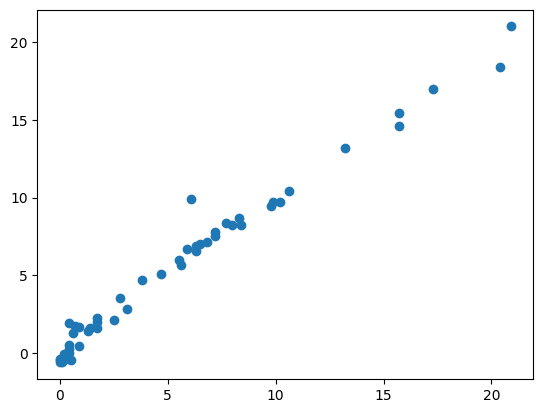

In [79]:
#Lasso Regression with CV
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)
y_pred=lassocv.predict(X_test)
print(f'r2_score:{r2_score(y_test,y_pred)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred)}')   
plt.scatter(y_test,y_pred)  

r2_score:0.9471448289951859
MEA:0.971039765665003
MSE:1.601956800795185
RMSE:1.2656843211461477


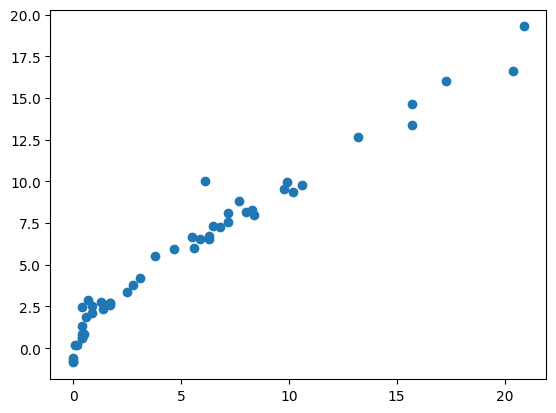

In [80]:
#Elastic Regularisation
en=ElasticNet(alpha=0.7,l1_ratio=0.9)
en.fit(X_train,y_train)
y_pred_en=en.predict(X_test)
print(f'r2_score:{r2_score(y_test,y_pred_en)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred_en)}')
print(f'MSE:{mean_squared_error(y_test,y_pred_en)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_en))}')
plt.scatter(y_test,y_pred_en)

r2_score:0.9761237174152506
MEA:0.5981827963628428


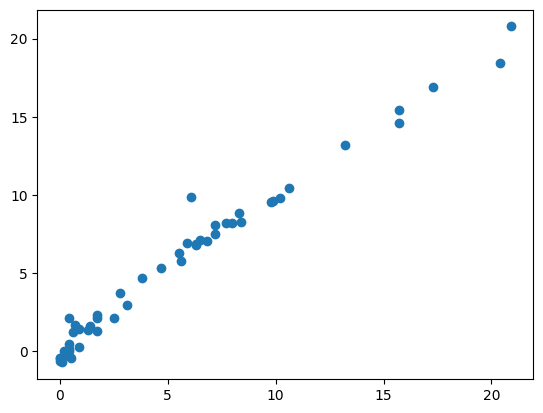

In [81]:
#ElasticNet Regression with CV
from sklearn.linear_model import ElasticNetCV
ecv=ElasticNetCV(cv=5)
ecv.fit(X_train,y_train)
y_pred=ecv.predict(X_test)
print(f'r2_score:{r2_score(y_test,y_pred)}')
print(f'MEA:{mean_absolute_error(y_test,y_pred)}')   
plt.scatter(y_test,y_pred) 

## Save the model

In [82]:
# Convert the NumPy array to a DataFrame
X_te_poly = pd.DataFrame(X_test)

In [83]:
import pickle

# 'l_reg' is the trained LinearRegression model
model_filename = 'poly_regression_model.pkl'

# Save the trained model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(lrr, file)

print("Trained model saved as a pickle file:", model_filename)

Trained model saved as a pickle file: poly_regression_model.pkl


## Test the model

In [84]:
import pandas as pd

# Define the new data points with separated month, date, and year
data = {
    "day": [5, 15, 25, 10, 20],
    "month": [6, 7, 8, 9, 6],
    "year": [2012, 2012, 2012, 2012, 2012],
    "Temperature": [35, 28, 40, 33, 30],
    "RH": [55, 48, 60, 50, 45],
    "Ws": [15, 20, 12, 18, 14],
    "Rain": [0, 0.5, 2.0, 0, 1.0],
    "FFMC": [88.0, 75.5, 92.0, 80.5, 85.0],
    "DMC": [35.0, 20.0, 50.0, 30.0, 25.0],
    "DC": [100.0, 80.0, 150.0, 90.0, 85.0],
    "ISI": [10.0, 5.0, 15.0, 8.0, 7.0],
    "BUI": [40.0, 25.0, 55.0, 35.0, 30.0],
    "Classes": [0, 1, 0, 1, 1],
    "Region":[0,0,0,1,0]
}

# Create the dataframe
random_df = pd.DataFrame(data)
print(random_df)


   day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI  \
0    5      6  2012           35  55  15   0.0  88.0  35.0  100.0  10.0  40.0   
1   15      7  2012           28  48  20   0.5  75.5  20.0   80.0   5.0  25.0   
2   25      8  2012           40  60  12   2.0  92.0  50.0  150.0  15.0  55.0   
3   10      9  2012           33  50  18   0.0  80.5  30.0   90.0   8.0  35.0   
4   20      6  2012           30  45  14   1.0  85.0  25.0   85.0   7.0  30.0   

   Classes  Region  
0        0       0  
1        1       0  
2        0       0  
3        1       1  
4        1       0  


In [85]:
# Load the trained model from the pickle file
model_filename = 'poly_regression_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to predict the target variable (FWI) based on the random IVs
predictions = loaded_model.predict(random_df)

# Create a DataFrame with the random IVs and the predictions
result_df = random_df.copy()
result_df['Predicted FWI'] = predictions

# Display the result DataFrame
result_df.head()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 14 features, but LinearRegression is expecting 90 features as input.